In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [2]:
#import CSV file
white_df = pd.read_csv('Resources/Data/winequality-white.csv', delimiter=';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# drop duplicate data
white_df = white_df.drop_duplicates(keep = 'first', inplace = False)
white_df = white_df.dropna(axis = 'columns', how='all')
white_df = white_df.reset_index(drop = True)
#white_df

In [4]:
white_stats = white_df.describe()
white_stats.drop(["count"], axis=0, inplace=True)
white_stats.T

,mean,std,min,25%,50%,75%,max
fixed acidity,6.839346,0.866860,3.80000,6.30000,6.8000,7.30000,14.20000
volatile acidity,0.280538,0.103437,0.08000,0.21000,0.2600,0.33000,1.10000
citric acid,0.334332,0.122446,0.00000,0.27000,0.3200,0.39000,1.66000
residual sugar,5.914819,4.861646,0.60000,1.60000,4.7000,8.90000,65.80000
chlorides,0.045905,0.023103,0.00900,0.03500,0.0420,0.05000,0.34600
free sulfur dioxide,34.889169,17.210021,2.00000,23.00000,33.0000,45.00000,289.00000
total sulfur dioxide,137.193512,43.129065,9.00000,106.00000,133.0000,166.00000,440.00000
density,0.993790,0.002905,0.98711,0.99162,0.9935,0.99571,1.03898
pH,3.195458,0.151546,2.72000,3.09000,3.1800,3.29000,3.82000
sulphates,0.490351,0.113523,0.22000,0.41000,0.4800,0.55000,1.08000


In [5]:
#datatype 
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 371.5 KB


In [6]:
# check for null values
white_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
white_df.shape

(3961, 12)

In [8]:
white_df['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

# Select your features (columns)

In [9]:
bins = [2,6,9]
group_names = ['Fair','Very Good']
white_df['quality'] = pd.cut(white_df['quality'], bins, labels = group_names)

In [10]:
#white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Fair
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Fair
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Fair
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Fair
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,Fair


In [11]:
X = white_df.drop("quality", axis =1)
y = white_df["quality"]

In [12]:
#X.head()

In [13]:
#y.head()

In [14]:
white_df['quality'].value_counts()

Fair         3136
Very Good     825
Name: quality, dtype: int64

[0.07003791 0.08178143 0.07373148 0.08094878 0.08138334 0.08252687
 0.08009888 0.10687374 0.08147989 0.07741886 0.18371881]


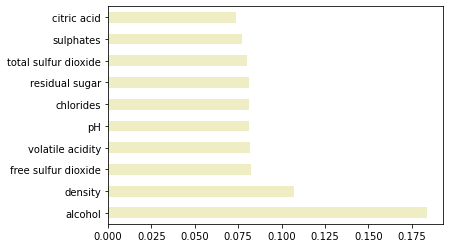

In [16]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind= "barh" , color = "#EEEDC4")
#plt.savefig('Resources/images/white_features_importance.jpg')
plt.show()



In [17]:
feat_importances.sort_values(ascending=False)

alcohol                 0.183719
density                 0.106874
free sulfur dioxide     0.082527
volatile acidity        0.081781
pH                      0.081480
chlorides               0.081383
residual sugar          0.080949
total sulfur dioxide    0.080099
sulphates               0.077419
citric acid             0.073731
fixed acidity           0.070038
dtype: float64

In [18]:
# Selected important features
selected_features = X[['alcohol', 'density','residual sugar','free sulfur dioxide','pH']]

# Create a Train Test Split 
### test all features

In [ ]:
# Split the data using train_test_split
# create the train and validation datasets

from sklearn.model_selection import train_test_split

X_train, X_left, y_train, y_left = train_test_split(X, y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

In [ ]:
#Train the model using the training data
model.fit(X_train, y_train)

In [ ]:
#And score the model using the unseen testing data
model.score(X_train, y_train),model.score(X_val, y_val)

In [ ]:
# Overall Score for the model
model.score(X_test, y_test)

### test top 5 features

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_left, y_train, y_left = train_test_split(selected_features,y, train_size=.7)
X_val, X_test, y_val, y_test = train_test_split(X_left, y_left, train_size=.7)

In [20]:
X_train.shape, X_val.shape, X_test.shape

((2772, 5), (832, 5), (357, 5))

In [21]:
#Train the model using the training data
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [22]:
#And score the model using the unseen testing data
model.score(X_train, y_train),model.score(X_val, y_val)

(1.0, 0.8221153846153846)

In [23]:
# Overall Score for the model
model.score(X_test, y_test)

0.8151260504201681

# Pre-pocessing 

In [24]:
# Scale your data

X_scale = StandardScaler().fit(X_train)

In [25]:
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [26]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape)

(2772, 5) (357, 5) (2772,)


# Train the Model

In [27]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

#predict the test set

y_pred = model_svm.predict(X_test)

In [28]:
print(f"Training Data Score: {model_svm.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_svm.score(X_test_scaled, y_test)}")

Training Data Score: 0.823953823953824
Testing Data Score: 0.7983193277310925


In [29]:
predictions = model_svm.predict(X_test_scaled)

### all features

In [ ]:
# Calculate classification report (all features)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions
                           ))

In [ ]:
# Plot Confusion Matrix

label_aux = plt.subplot()
cm_svm_white = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (All features)')
#plt.savefig('Resources/images/svm_white_cm_non-nor_all.jpg');

### selected features

In [30]:
# Calculate classification report (selected features)

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,
                           ))

              precision    recall  f1-score   support

        Fair       0.81      0.97      0.88       276
   Very Good       0.67      0.22      0.33        81

    accuracy                           0.80       357
   macro avg       0.74      0.59      0.61       357
weighted avg       0.78      0.80      0.76       357



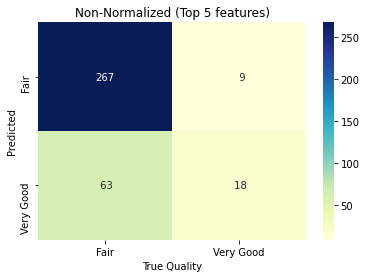

In [31]:
# Plot Confusion Matrix (selected features)

label_aux = plt.subplot()
cm_svm_red = confusion_matrix(y_test, predictions)
cm_svm = pd.DataFrame(cm_svm_red,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('True Quality');label_aux.set_ylabel('Predicted')
label_aux.set_title('Non-Normalized (Top 5 features)')
#plt.savefig('Resources/images/svm_white_cm_non-nor_selected.jpg');

# Hyperparameter Tuning (GridSearchCV)

In [32]:
from pprint import pprint
print('Parameters:\n')
pprint(model_svm.get_params())

Parameters:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [33]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [ 0.001,0.01,1,10],
              'gamma': [0.001,0.01,1,10],
             'kernel': ['linear', 'rbf', 'sigmoid']}

grid = GridSearchCV(model_svm, param_grid, verbose=3, return_train_score=True, scoring='accuracy' , cv=10)

In [34]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.795), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.791), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV]  C=0.001, gamma=0.001, kernel

[CV]  C=0.001, gamma=0.01, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV]  C=0.001, gamma=0.01, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV]  C=0.001, gamma=0.01, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=sigmoid .............................
[CV]  C=0.001, gamma=0.01, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, score=(train=0.794, test=0.795), total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, score=(train=0.794, test=0.791), total=   0.0s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV]  C=0.001, gamma=1, kernel=linear, sco

[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.795), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.791), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.001, gamma=10, kernel=sigmoid ...............................
[CV]  C=0.001, gamma=10, kernel=sigmoid, score

[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV]  C=0.01, gamma=0.01, kernel=rbf, score=(train=0.794, test=0

[CV]  C=0.01, gamma=10, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV]  C=0.01, gamma=10, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV]  C=0.01, gamma=10, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=10, kernel=linear .................................
[CV]  C=0.01, gamma=10, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=(train=0.794, test=0.795), total=   0.1s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=(train=0.794, test=0.791), total=   0.1s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV]  C=0.01, gamma=10, kernel=rbf, score=(train=0.794, test=0.7

[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.791), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=(train=0.794, test=0

[CV]  C=1, gamma=1, kernel=sigmoid, score=(train=0.729, test=0.751), total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=(train=0.731, test=0.729), total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=(train=0.729, test=0.744), total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV]  C=1, gamma=1, kernel=sigmoid, score=(train=0.732, test=0.733), total=   0.1s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=(train=0.794, test=0.795), total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=(train=0.794, test=0.791), total=   0.0s
[CV] C=1, gamma=10, kernel=linear ....................................
[CV]  C=1, gamma=10, kernel=linear, score=(train=0.794, test=0.794), total= 

[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.791), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=(train=0.794, test=0.794), total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score

[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.896, test=0.773), total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.889, test=0.816), total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.891, test=0.794), total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.891, test=0.812), total=   0.1s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=(train=0.894, test=0.794), total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.731, test=0.741), total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=(train=0.736, test=0.709), total=   0.1s
[CV] C

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   46.3s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.001, 0.01, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.8127626418720618


In [36]:
# Make predictions with the hypertuned model
grid_predictions = grid.predict(X_test_scaled)

## Classification report 
### All features

In [ ]:
# Calculate classification report - all features

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions,
                           ))
                          

In [ ]:
# Plot Confusion Matrix

label_aux = plt.subplot()
cm_svm_white = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (All features)')
#plt.savefig('Resources/images/svm_white_cm_nor_all.jpg');


### Selected features

In [37]:
# Calculate classification report - selected features

from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions,
                   ))

              precision    recall  f1-score   support

        Fair       0.80      0.99      0.88       276
   Very Good       0.73      0.14      0.23        81

    accuracy                           0.79       357
   macro avg       0.76      0.56      0.55       357
weighted avg       0.78      0.79      0.73       357



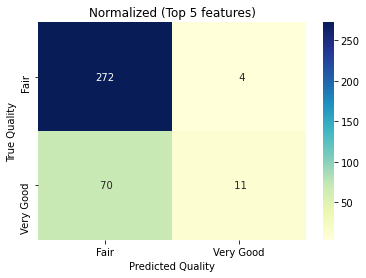

In [38]:
# Plot Confusion Matrix

label_aux = plt.subplot()
cm_svm_white = confusion_matrix(y_test, grid_predictions)
cm_svm = pd.DataFrame(cm_svm_white,
                     index = ['Fair','Very Good'], 
                     columns = ['Fair','Very Good'])
sns.heatmap(cm_svm,annot=True,cmap=plt.cm.YlGnBu,fmt='3')
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');
label_aux.set_title('Normalized (Top 5 features)')
#plt.savefig('Resources/images/svm_white_cm_nor_selected.jpg');

In [39]:
# Save the Model (test all features, selected features)
import joblib
#filename = 'Resources/results/svm_white_all.sav'

#filename = 'Resources/results/svm_white_selected.sav'
joblib.dump(model_svm, filename)

['Resources/results/svm_white_selected.sav']